
## Group Number – 3
## Group Name – Tech Up
## Group Members:
1. Basma Aldamegh
2. Eithar Alahmadi
3. Mona Alomari
4. Shehanh Alotaibi
5. Zainab Aljohani

# Project: Predict Future Stock Prices – Machine Learning

## Introduction:
We will implement a mix of machine learning algorithms to predict the future stock price of this company, starting with simple algorithms like averaging and linear regression, and then move on to advanced techniques like using the LSTM neural network.

# Dataset (Apple):
From historical data (https://finance.yahoo.com/quote/AAPL/history?p=AAPL)







In [1]:
#This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#to predict the closing stock price of a corporation(Apple Inc.).
#import the libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential 
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

# Get Data (Apple)

In [2]:
#Get the stock quote
Apple_df=pdr.get_data_yahoo('AAPL','2011-01-01','2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
#Show the Data
Apple_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,11.533929,11.552857,11.475357,11.520000,9.876848,193508000
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.091495,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.144158,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.227141,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.218877,300428800
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300


In [4]:
#Get the number of rows and columns in the data set
Apple_df.shape

(2769, 6)

# Data Visualization

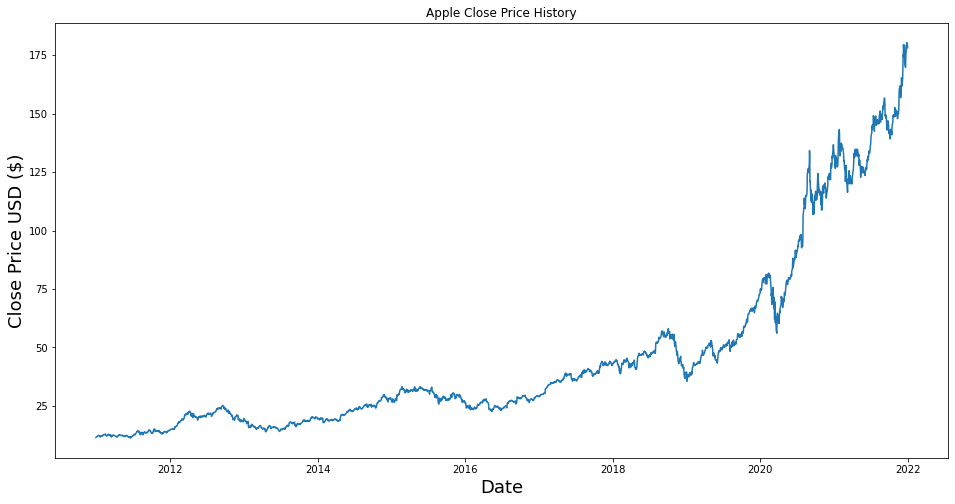

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Apple Close Price History')
plt.plot(Apple_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

# Splitting Data into a Training set and a Test set

In [6]:
#Create a new dataframe with only the Close column
Apple_data = Apple_df[['Close']]

#Convert dataFrame to a numpy array
Apple_dataset = Apple_data.values

#Get the number of rows to train the model on 
training_data_len =int(0.8*len(Apple_dataset))
training_data_len

2215

In [7]:
#Scale the data(transform the data between 0 and 1)
Apple_scaler=MinMaxScaler(feature_range=(0,1))
Apple_scaled_data =Apple_scaler.fit_transform(Apple_dataset)
Apple_scaled_data

array([[0.00152939],
       [0.00301019],
       [0.00337353],
       ...,
       [0.9938486 ],
       [0.994381  ],
       [0.98740153]])

In [8]:
#Create the training data set 
#Create the scaled training data set
Apple_train_data=Apple_scaled_data[0:training_data_len,:]
#train_data
#Split the data into x_train and y_train data set
x_train_A=[]
y_train_A=[]


for i in range(60,len(Apple_train_data)):
    x_train_A.append(Apple_train_data[i-60:i,0])
    y_train_A.append(Apple_train_data[i,0])
    if i <=60:
        print(x_train_A)
        print(y_train_A)
        print()

[array([0.00152939, 0.00301019, 0.00337353, 0.00394598, 0.00388896,
       0.00439382, 0.00573098, 0.00555988, 0.00614712, 0.00641328,
       0.00700476, 0.00535074, 0.0049684 , 0.00366715, 0.00240815,
       0.00467478, 0.00550917, 0.00602672, 0.00589152, 0.00438959,
       0.00506979, 0.00627598, 0.006126  , 0.0059401 , 0.00658651,
       0.00772299, 0.0084243 , 0.00904958, 0.00828489, 0.00877286,
       0.00926505, 0.00941714, 0.01009946, 0.00907916, 0.00744415,
       0.00491981, 0.00576689, 0.00582181, 0.00693717, 0.00800394,
       0.00718009, 0.00777368, 0.00934532, 0.00943827, 0.00845811,
       0.0085426 , 0.00784762, 0.00662242, 0.00774622, 0.00807787,
       0.00636048, 0.00310313, 0.00408119, 0.00324255, 0.00506557,
       0.00546692, 0.00504233, 0.00626331, 0.00765116, 0.00741879])]
[0.0075286417207532375]



In [9]:
#Convert the x_train and y_train to numpy arrays
x_train_A, y_train_A=np.array(x_train_A),np.array(y_train_A)

In [10]:
#Reshape the data(shape become 3 dimensional)
x_train_A=np.reshape(x_train_A,(x_train_A.shape[0],x_train_A.shape[1],1))
x_train_A.shape

(2155, 60, 1)

# Build Machine Learning Model (Apple)

In [11]:
#Bulid the LSTM model
Apple_model=Sequential()
#add the layer to the model
Apple_model.add(LSTM(50,return_sequences=True,input_shape=(x_train_A.shape[1],1)))
Apple_model.add(LSTM(50,return_sequences=False))
Apple_model.add(Dense(25))
Apple_model.add(Dense(1))

In [12]:
#Compile the model
Apple_model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Train the model
Apple_model.fit(x_train_A,y_train_A,batch_size=1,epochs=1)

2155/2155 [==============================] - 35s 15ms/step - loss: 1.6192e-04


# Save The Model (Apple)

In [14]:
Apple_model.save("Saved_LSTM_Model_Apple")

INFO:tensorflow:Assets written to: Saved_LSTM_Model_Apple\assets


INFO:tensorflow:Assets written to: Saved_LSTM_Model_Apple\assets


# Loading The Model 

In [15]:
from tensorflow import keras
Apple_model = keras.models.load_model("Saved_LSTM_Model_Apple")

# Testing The LSTM Model (Apple) 

In [16]:
#Create the testing data set
#Create a new array containing scaled values from index 2155 to 2769
Apple_test_data=Apple_scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test_A=[]
y_test_A=Apple_dataset[training_data_len:, :]

for i in range(60,len(Apple_test_data)):
    x_test_A.append(Apple_test_data[i-60:i,0])


In [17]:
#Convert the data to a numpy array
x_test_A = np.array(x_test_A)

In [18]:
#Reshape the data(shape become 3 dimensional)
x_test_A=np.reshape(x_test_A,(x_test_A.shape[0],x_test_A.shape[1],1))

In [19]:
#Get the models predicted price values
Apple_predictions =Apple_model.predict(x_test_A)
Apple_predictions =Apple_scaler.inverse_transform(Apple_predictions)

In [20]:
#Get the root mean squared error(RMSE)
Apple_rese= np.sqrt(np.mean(Apple_predictions - y_test_A)**2)
Apple_rese

3.9376883110845133

C:\Users\ali\AppData\Local\Temp/ipykernel_13684/2163227058.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



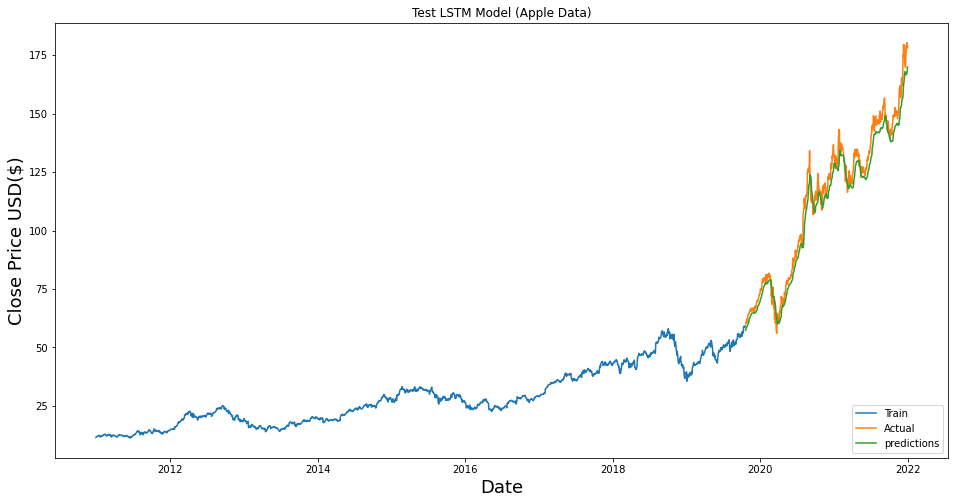

In [78]:
#Plot the data
Apple_train=Apple_data[:training_data_len]
Apple_valid=Apple_data[training_data_len:]
Apple_valid['predictions'] =Apple_predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Test LSTM Model (Apple Data)')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(Apple_train['Close'])
plt.plot(Apple_valid[['Close','predictions']])
plt.legend(['Train','Actual','predictions'],loc='lower right')
plt.show()

In [22]:
#Show the valid (actual) and predicted prices
Apple_valid

,Close,predictions
Date,,
2019-10-21,60.127499,57.345787
2019-10-22,59.990002,57.640244
2019-10-23,60.794998,57.921062
2019-10-24,60.895000,58.252922
2019-10-25,61.645000,58.581608
...,...,...
2021-12-23,176.279999,166.697739
2021-12-27,180.330002,167.107880
2021-12-28,179.289993,168.100204


# Predicted Stock Market for Apple (for a specific day)

In [23]:
#predicted the close price for this date 2022-01-03

#Get the qoute
apple_quote=pdr.get_data_yahoo('AAPL','2011-01-01','2022-01-03')
#Create a new dataframe
App_new_df=apple_quote[['Close']]
#Get last 60 day closing price values and convert the dataframe to an array
Alast_60_days= App_new_df[-60:].values
#Scale the data to be values between 0 and 1
Alast_60_days_scaled=Apple_scaler.fit_transform(Alast_60_days)
#Create empty list
x_test_A=[]
#Append past 60 days
x_test_A.append(Alast_60_days_scaled)
#Convert the X_test to numpy array
x_test_A=np.array(x_test_A)
#Reshape the data(shape become 3 dimensional)
x_test_A=np.reshape(x_test_A,(x_test_A.shape[0],x_test_A.shape[1],1))
#Get the predicted scaled price
Apple_pred_price =Apple_model.predict(x_test_A)
#undo the scaling
Apple_pred_price =Apple_scaler.inverse_transform(Apple_pred_price)
print(Apple_pred_price)

[*********************100%***********************]  1 of 1 completed
[[176.08902]]


In [24]:
#Get the real price for this date 2022-01-03
apple_quote2=pdr.get_data_yahoo('AAPL','2022-01-04','2022-01-04')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-01-03    182.009995
Name: Close, dtype: float64


In [25]:
#predicted the close price for this date 2022-01-04
#Get the qoute
apple_quote=pdr.get_data_yahoo('AAPL','2011-01-01','2022-01-04')
#Create a new dataframe
App_new_df2=apple_quote[['Close']]
#Get last 60 day closing price values and convert the dataframe to an array
Alast_60_days2= App_new_df2[-60:].values
#Scale the data to be values between 0 and 1
Alast_60_days_scaled2=Apple_scaler.fit_transform(Alast_60_days2)
#Create empty list
X_testA2=[]
#Append past 60 days
X_testA2.append(Alast_60_days_scaled2)
#Convert the X_test to numpy array
X_testA2=np.array(X_testA2)
#Reshape the data(shape become 3 dimensional)
X_testA2=np.reshape(X_testA2,(X_testA2.shape[0],X_testA2.shape[1],1))
#Get the predicted scaled price
Apple_pred_price2 =Apple_model.predict(X_testA2)
#undo the scaling
Apple_pred_price2 =Apple_scaler.inverse_transform(Apple_pred_price2)
print(Apple_pred_price2)

[*********************100%***********************]  1 of 1 completed
[[176.83287]]


In [26]:
#Get the real price for this date 2022-01-04
apple_quote2=pdr.get_data_yahoo('AAPL','2022-01-05','2022-01-05')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-01-04    179.699997
Name: Close, dtype: float64


# Get Data (Bitcoin)

# Dataset (Bitcoin):
From historical data (https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch)

In [27]:
#Get the stock quote
BTC_df=pdr.get_data_yahoo('BTC-USD','2011-01-01','2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [28]:
#Show the Data
BTC_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883


In [29]:
#Get the number of rows and columns in the data set
BTC_df.shape

(2662, 6)

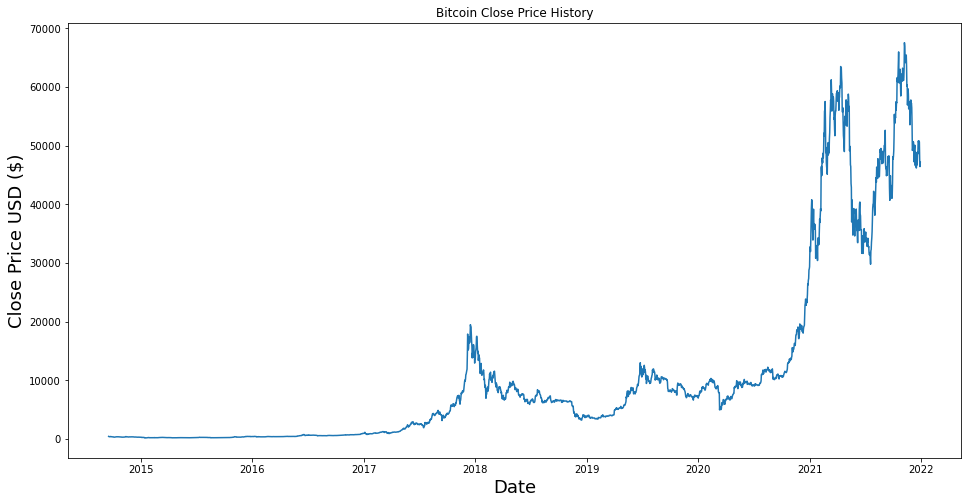

In [30]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.plot(BTC_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [31]:

#Create a new dataframe with only the Close column
BTC_data = BTC_df[['Close']]

#Convert dataFrame to a numpy array
BTC_dataset = BTC_data.values

#Get the number of rows to train the model on 
Btraining_data_len =int(0.8*len(BTC_dataset))
Btraining_data_len

2129

In [32]:
#Scale the data(transform the data between 0 and 1)
BTC_scaler=MinMaxScaler(feature_range=(0,1))
BTC_scaled_data =BTC_scaler.fit_transform(BTC_dataset)
BTC_scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.70354132],
       [0.68656304],
       [0.69744637]])

In [33]:
#Create the training data set 
#Create the scaled training data set
BTC_train_data=BTC_scaled_data[0:Btraining_data_len,:]
#train_data
#Split the data into x_train and y_train data set
x_train_B=[]
y_train_B=[]


for i in range(60,len(BTC_train_data)):
    x_train_B.append(BTC_train_data[i-60:i,0])
    y_train_B.append(BTC_train_data[i,0])
    if i <=60:
        print(x_train_B)
        print(y_train_B)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]



In [34]:
#Convert the x_train and y_train to numpy arrays
x_train_B, y_train_B=np.array(x_train_B),np.array(y_train_B)

In [35]:
#Reshape the data(shape become 3 dimensional)
x_train_B=np.reshape(x_train_B,(x_train_B.shape[0],x_train_B.shape[1],1))
x_train_B.shape

(2069, 60, 1)

In [36]:
#Bulid the LSTM model
BTC_model=Sequential()
#add the layer to the model
BTC_model.add(LSTM(50,return_sequences=True,input_shape=(x_train_B.shape[1],1)))
BTC_model.add(LSTM(50,return_sequences=False))
BTC_model.add(Dense(25))
BTC_model.add(Dense(1))

In [37]:
#Compile the model
BTC_model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
#Train the model
BTC_model.fit(x_train_B,y_train_B,batch_size=1,epochs=1)

2069/2069 [==============================] - 33s 15ms/step - loss: 1.9762e-04


In [39]:
BTC_model.save("Saved_LSTM_Model_BTC")

INFO:tensorflow:Assets written to: Saved_LSTM_Model_BTC\assets


INFO:tensorflow:Assets written to: Saved_LSTM_Model_BTC\assets


In [40]:
from tensorflow import keras
BTC_model = keras.models.load_model("Saved_LSTM_Model_BTC")

In [41]:
#Create the testing data set
#Create a new array containing scaled values from index 2155 to 2769
BTC_test_data=BTC_scaled_data[Btraining_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test_B=[]
y_test_B=BTC_dataset[Btraining_data_len:, :]

for i in range(60,len(BTC_test_data)):
    x_test_B.append(BTC_test_data[i-60:i,0])

In [42]:
#Convert the data to a numpy array
x_test_B = np.array(x_test_B)

In [43]:
#Reshape the data(shape become 3 dimensional)
x_test_B=np.reshape(x_test_B,(x_test_B.shape[0],x_test_B.shape[1],1))

In [44]:
#Get the models predicted price values
BTC_predictions =BTC_model.predict(x_test_B)
BTC_predictions =BTC_scaler.inverse_transform(BTC_predictions)

In [45]:
#Get the root mean squared error(RMSE)
BTC_rese= np.sqrt(np.mean(BTC_predictions - y_test_B)**2)
BTC_rese

4730.488695327158

C:\Users\ali\AppData\Local\Temp/ipykernel_13684/3369838837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_valid['predictions'] =BTC_predictions


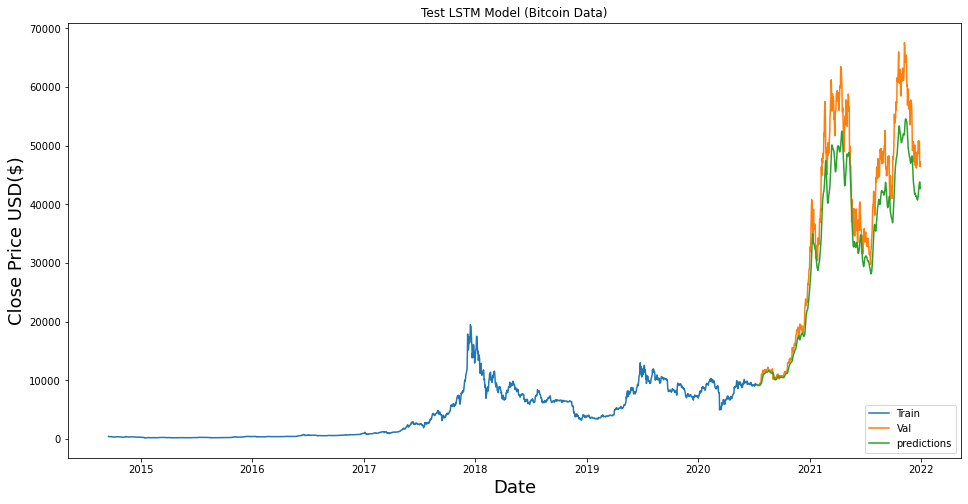

In [46]:
#Plot the data
BTC_train=BTC_data[:Btraining_data_len]
BTC_valid=BTC_data[Btraining_data_len:]
BTC_valid['predictions'] =BTC_predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Test LSTM Model (Bitcoin Data)')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(BTC_train['Close'])
plt.plot(BTC_valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [47]:
#Show the valid (actual) and predicted prices
BTC_valid

,Close,predictions
Date,,
2020-07-16,9132.227539,9207.254883
2020-07-17,9151.392578,9181.469727
2020-07-18,9159.040039,9157.336914
2020-07-19,9185.817383,9138.614258
2020-07-20,9164.231445,9129.119141
...,...,...
2021-12-26,50809.515625,43210.312500
2021-12-27,50640.417969,43602.144531
2021-12-28,47588.855469,43832.628906


# Predicted Crynptocurrince for Bitcoin (for a specific day)

In [80]:
#BTC
#predicted the close price for this date 2022-01-04
#Get the qoute
BTC_quote=pdr.get_data_yahoo('BTC-USD','2011-01-01','2022-01-04')
#Create a new dataframe
BTCnew_df=BTC_quote[['Close']]
#Get last 60 day closing price values and convert the dataframe to an array
Blast_60_days= BTCnew_df[-60:].values
#Scale the data to be values between 0 and 1
Blast_60_days_scaled=BTC_scaler.fit_transform(Blast_60_days)
#Create empty list
X_test_B=[]
#Append past 60 days
X_test_B.append(Blast_60_days_scaled)
#Convert the X_test to numpy array
X_test_B=np.array(X_test_B)
#Reshape the data(shape become 3 dimensional)
X_test_B=np.reshape(X_test_B,(X_test_B.shape[0],X_test_B.shape[1],1))
#Get the predicted scaled price
BTC_pred_price =BTC_model.predict(X_test_B)
#undo the scaling
BTC_pred_price =BTC_scaler.inverse_transform(BTC_pred_price)
print(BTC_pred_price)

[*********************100%***********************]  1 of 1 completed
[[1.2358298e+08]]


In [49]:
#Get the real price for this date 2022-01-04
BTC_quote2=pdr.get_data_yahoo('BTC-USD','2022-01-05','2022-01-05')
print(BTC_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-01-04    45897.574219
Name: Close, dtype: float64


# Part 2:Predict Future Price

# Predicted for Stock Market in The Future (Apple)

In [50]:
Fut_App_projection=30
FutA_df=Apple_df.copy()
FutA_df['Projection']= FutA_df[['Close']].shift(-Fut_App_projection)


In [51]:
X_apple=np.array(FutA_df[['Close']])
X_apple=X_apple[:-Fut_App_projection]
#print(X_apple)
FutA_df


,Open,High,Low,Close,Adj Close,Volume,Projection
Date,,,,,,,
2010-12-31,11.533929,11.552857,11.475357,11.520000,9.876848,193508000,12.827857
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.091495,445138400,12.853571
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.144158,309080800,12.968929
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.227141,255519600,12.796429
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.218877,300428800,12.520000
...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600,NaN
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,NaN
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,NaN


In [52]:
y_apple=FutA_df['Projection'].values
y_apple=y_apple[:-Fut_App_projection]
print(y_apple)


[ 12.82785702  12.85357094  12.96892929 ... 179.28999329 179.38000488
 178.19999695]


In [53]:
x_train_pA,x_test_pA,y_train_pA,y_test_pA = train_test_split(X_apple,y_apple,test_size=.15)


# Future Prediction Using Linear Model (Apple)

In [54]:
linReg_apple = LinearRegression()
linReg_apple.fit(x_train_pA, y_train_pA)

LinearRegression(copy_X=True,fit_intercept=True, n_jobs=None,normalize=False)


LinearRegression(normalize=False)

In [55]:
Apple_model_confidence=linReg_apple.score(x_test_pA, y_test_pA)
print(Apple_model_confidence)


0.9770218540486246


In [56]:
x_projection_apple=np.array(FutA_df[['Close']])[-Fut_App_projection:]
print(x_projection_apple)


[[153.49000549]
 [157.86999512]
 [160.55000305]
 [161.02000427]
 [161.41000366]
 [161.94000244]
 [156.80999756]
 [160.24000549]
 [165.30000305]
 [164.77000427]
 [163.75999451]
 [161.83999634]
 [165.32000732]
 [171.17999268]
 [175.08000183]
 [174.55999756]
 [179.44999695]
 [175.74000549]
 [174.33000183]
 [179.30000305]
 [172.25999451]
 [171.13999939]
 [169.75      ]
 [172.99000549]
 [175.63999939]
 [176.27999878]
 [180.33000183]
 [179.28999329]
 [179.38000488]
 [178.19999695]]


In [57]:
linReg_prodection_apple=linReg_apple.predict(x_projection_apple)
print(linReg_prodection_apple)

[159.81717534 164.38376332 167.17794619 167.66797063 168.07458495
 168.62716298 163.27860725 166.85474198 172.1303079  171.57772987
 170.5246912  168.52289637 172.1511644  178.26079957 182.32695873
 181.78480099 186.88312641 183.01508017 181.54500688 186.7267424
 179.38681214 178.21910247 176.76988568 180.1479234  182.91081356
 183.5780785  187.80062167 186.71630619 186.81015251 185.57987333]


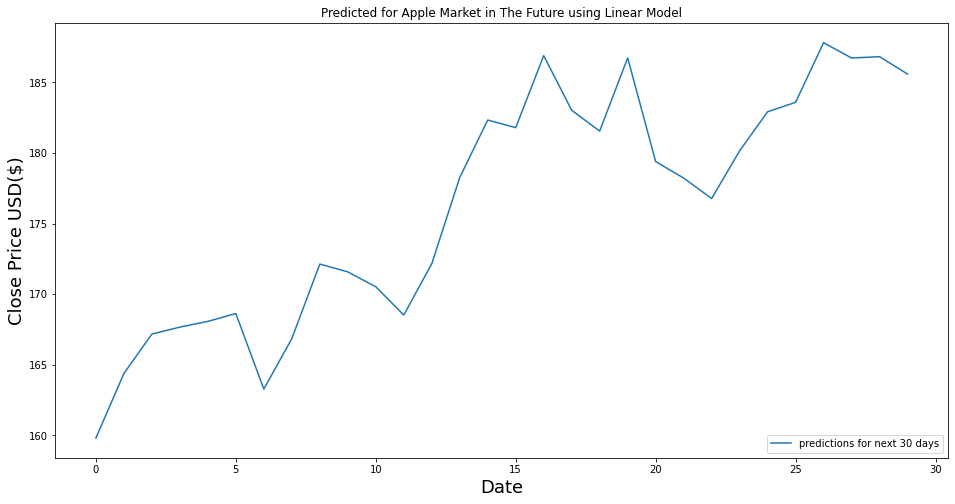

In [58]:
plt.figure(figsize=(16,8))
plt.title('Predicted for Apple Market in The Future using Linear Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(linReg_prodection_apple)
plt.legend(['predictions for next 30 days'],loc='lower right')
plt.show()


# Future Prediction Using LSTM Model (Apple)

In [59]:
Apple_model.fit(x_train_pA,y_train_pA,batch_size=1,epochs=1)

2328/2328 [==============================] - 6s 2ms/step - loss: 302.4431A: 0s - loss: 3


In [60]:
#Get the models future prediction price values
prediction_next_30d_apple=Apple_model.predict(x_projection_apple)

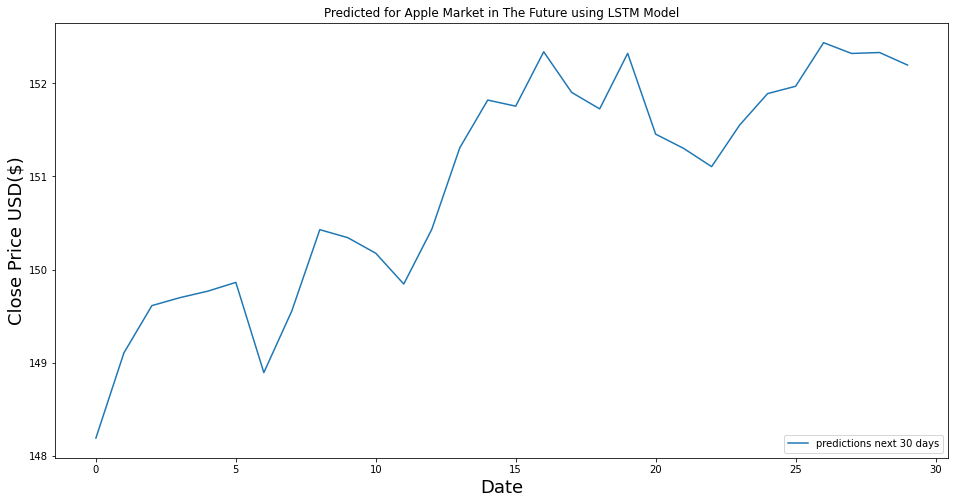

In [61]:
plt.figure(figsize=(16,8))
plt.title('Predicted for Apple Market in The Future using LSTM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(prediction_next_30d_apple)
plt.legend(['predictions next 30 days'],loc='lower right')
plt.show()

# Predicted for Bitcoin in The Future

In [62]:
Fut_BTC_projection=30
Fut_bt=BTC_df.copy()
Fut_bt['Projection']= Fut_bt[['Close']].shift(-Fut_BTC_projection)

X_BTC=np.array(Fut_bt[['Close']])
X_BTC=X_BTC[:-Fut_BTC_projection]
#print(X_BTC)
Fut_bt

,Open,High,Low,Close,Adj Close,Volume,Projection
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,383.757996
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,391.441986
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,389.545990
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,382.845001
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,386.475006
...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,NaN
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,NaN
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,NaN


In [63]:
y_BTC=Fut_bt['Projection'].values
y_BTC=y_BTC[:-Fut_BTC_projection]
print(y_BTC)


[  383.75799561   391.44198608   389.54598999 ... 47588.85546875
 46444.7109375  47178.125     ]


In [64]:
x_train_pB,x_test_pB,y_train_pB,y_test_pB = train_test_split(X_BTC,y_BTC,test_size=.15)

# BTC Future Prediction Using Linear Model

In [65]:
linReg_BTC = LinearRegression()
linReg_BTC.fit(x_train_pB, y_train_pB)

LinearRegression(copy_X=True,fit_intercept=True, n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [66]:
x_projection_BTC=np.array(Fut_bt[['Close']])[-Fut_BTC_projection:]
print(x_projection_BTC)


[[57229.828125  ]
 [56477.81640625]
 [53598.24609375]
 [49200.703125  ]
 [49368.84765625]
 [50582.625     ]
 [50700.0859375 ]
 [50504.796875  ]
 [47672.12109375]
 [47243.3046875 ]
 [49362.5078125 ]
 [50098.3359375 ]
 [46737.48046875]
 [46612.6328125 ]
 [48896.72265625]
 [47665.42578125]
 [46202.14453125]
 [46848.77734375]
 [46707.015625  ]
 [46880.27734375]
 [48936.61328125]
 [48628.51171875]
 [50784.5390625 ]
 [50822.1953125 ]
 [50429.859375  ]
 [50809.515625  ]
 [50640.41796875]
 [47588.85546875]
 [46444.7109375 ]
 [47178.125     ]]


In [67]:
linReg_prodection_BTC=linReg_BTC.predict(x_projection_BTC)
print(linReg_prodection_BTC)

[57323.74517981 56579.0739219  53727.61138033 49372.99326389
 49539.49651972 50741.42606265 50857.74045231 50664.35762568
 47859.33187319 47434.70118634 49533.21855982 50261.86419363
 46933.81436787 46810.18536195 49071.97997859 47852.7019143
 46403.70389746 47044.02486305 46903.64689448 47075.21738843
 49111.48122725 48806.38707461 50941.36922199 50978.65790561
 50590.15159804 50966.10198579 50798.65490851 47776.8790122
 46643.902589   47370.15772422]


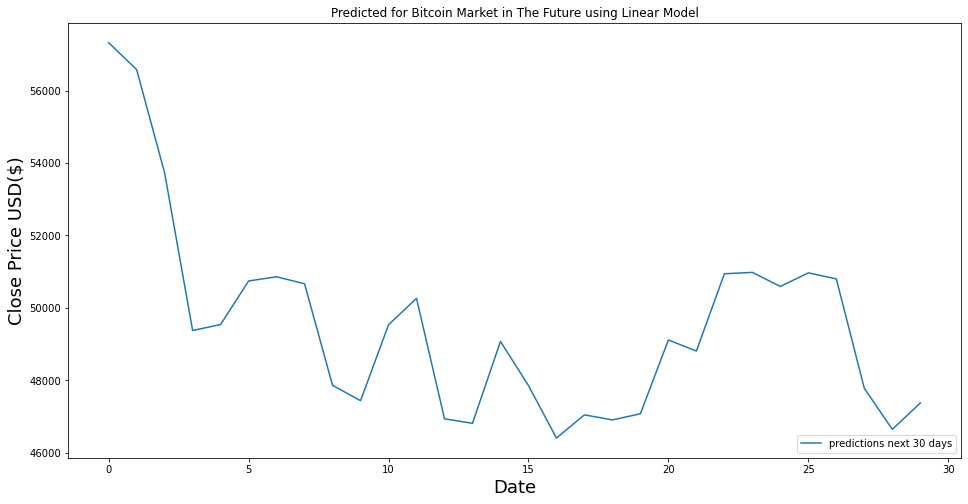

In [68]:
plt.figure(figsize=(16,8))
plt.title('Predicted for Bitcoin Market in The Future using Linear Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(linReg_prodection_BTC)
plt.legend(['predictions next 30 days'],loc='lower right')
plt.show()

# Put Preditions in df

In [73]:
#put preditions in df
Apple_lenp=int(len(prediction_next_30d_apple))
Ap=Apple_data[:Apple_lenp]
Ap['Apple_predictions30'] =prediction_next_30d_apple
#Ap

Bit_lenp=int(len(linReg_prodection_BTC))
Bp=BTC_data[:Bit_lenp]
Bp['Btc_predictions30'] =linReg_prodection_BTC
#Bp

C:\Users\ali\AppData\Local\Temp/ipykernel_13684/2173964681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ap['Apple_predictions30'] =prediction_next_30d_apple
C:\Users\ali\AppData\Local\Temp/ipykernel_13684/2173964681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bp['Btc_predictions30'] =linReg_prodection_BTC


# DASH

In [81]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pandas_datareader import data as pdr
import datetime as dt
import streamlit as st
import plotly.graph_objs as go

In [82]:
app = dash.Dash(__name__)
app.title = "Stock Price Predictions App"
#First the layout
app.layout = html.Div([
   
    html.H1("Predict Future Stock Prices", style={"textAlign": "center"}),
    html.H4("Stock Price Prediction Using Machine Learning", style={"textAlign": "center"}),
    html.Br(),
    html.Br(),
    html.Br(),
    html.Br(),
    html.Br(),
            html.Div([
                html.H2("Actual Closing Price For Apple",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                                go.Scatter(
                                x=Apple_df.index,
                                y=Apple_df["Close"],
                                mode='markers'
                           )

                       ],
                       "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Year'},
                            yaxis={'title':'Apple Closing Rate'}
                       )
                    }

                ),
                html.H2("LSTM Predicted Closing Price For Apple",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                                go.Scatter(
                                x=Apple_valid.index,
                                y=Apple_valid["predictions"],
                                mode='markers'
                           )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Apple Closing Rate'}
                     )
                    }),
                
                 html.H2("Predictions Closing Price For Apple Next 30 Days",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Future Predicted Data",
                    figure={
                        "data":[
                                go.Scatter(
                                y=Ap['Apple_predictions30'],
                                mode='markers'
                           )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Days'},
                            yaxis={'title':'Apple Closing Rate'}
                     )
                    }),
                
                    html.H2("Actual Closing Price For Bitcoin",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data BTC",
                    figure={
                        "data":[
                                go.Scatter(
                                x=BTC_df.index,
                                y=BTC_df["Close"],
                                mode='markers'
                           )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Year'},
                            yaxis={'title':'BTC Closing Rate'}
                     )
                    }),
                
                    html.H2("LSTM Predicted Closing Price For Bitcoin",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data BTC",
                    figure={
                        "data":[
                                go.Scatter(
                                x=BTC_valid.index,
                                y=BTC_valid["predictions"],
                     
                                mode='markers'
                           )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'BTC Closing Rate'}
                     )
                    }),
                 html.H2("Predictions Closing Price For BTC Next 30 Days",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Future Predicted Data BTC",
                    figure={
                        "data":[
                                go.Scatter(
                                y=Bp['Btc_predictions30'],
                                mode='markers'
                           )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Days'},
                            yaxis={'title':'BTC Closing Rate'}
                     )
                    })
                
    ])    
])

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/

2022-01-10 10:09:54.904 INFO    __main__: Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
2022-01-10 10:09:54.912 INFO    werkzeug:  * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [10/Jan/2022 10:09:56] "GET / HTTP/1.1" 200 -
2022-01-10 10:09:56.900 INFO    werkzeug: 127.0.0.1 - - [10/Jan/2022 10:09:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
2022-01-10 10:09:57.147 INFO    werkzeug: 127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_dash-dependencies HTTP/1.1" 200 -
2022-01-10 10:09:57.226 INFO    werkzeug: 127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_dash-layout HTTP/1.1" 200 -
2022-01-10 10:09:57.254 INFO    werkzeug: 127.0.0.1 - - [10/Jan/2022 10:09:57] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.